In [1]:
# Common imports
import pandas as pd
import numpy as np
import scipy as sp

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import mglearn

## 1 分类变量（Categorical Variables）

### 1.1 One-hot编码（虚拟变量）

One-Hot-Encoding (Dummy variables)

将数据转换成分类变量有两种方法：
1. pandas
2. sklearn

In [2]:
from IPython.display import display

In [8]:
# 文件中没有含有名称的表头，因此header=None
# 在names中显示地提供列名称
data = pd.read_csv(
    'adult.data', header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# display可以在notebook中输出漂亮的格式
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


将数据集中的label提取出来：

In [22]:
X = data.iloc[:, :-1]

In [29]:
y = data['income']

需要检查数据中的分类变量（类别是一样的）：

**检查列的内容一个好方法是pandas中的Series的`value_counts`函数。**

In [31]:
X['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [32]:
X['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

> 实际中，应该这样检查所有的列以便确定是有意义的分类数据。

In [33]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [34]:
X.shape

(32561, 14)

**使用`pd.get_dummies()`转换数据**

In [38]:
X_dummies = pd.get_dummies(X)

In [39]:
X_dummies.shape

(32561, 108)

In [45]:
X_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)

连续特征没有变化，分类特征的每个可能取值都被扩展成一个新特征。

**`pd.get_dummies()`函数将所有数字看作是连续的，不会为其创建虚拟变量。为解决这个问题可以使用`OneHotEncoder`，指定哪些变量是连续的，哪些变量是离散的。也可以将数据框中的数值列转换为字符串。**

In [65]:
demo_df = pd.DataFrame({"integer feature": [0, 1, 2, 1],
                       "categorical feature": ['s', 'f', 's', 'b']})
display(demo_df)

,categorical feature,integer feature
0,s,0
1,f,1
2,s,2
3,b,1


**使用`pd.get_dummies`只会编码字符串，不会改变整数特征。**

In [66]:
pd.get_dummies(demo_df)

,integer feature,categorical feature_b,categorical feature_f,categorical feature_s
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


可以显示地指定想要编码的列：

In [68]:
pd.get_dummies(demo_df, columns=demo_df.columns)

,categorical feature_b,categorical feature_f,categorical feature_s,integer feature_0,integer feature_1,integer feature_2
0,0,0,1,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,1,0,0,0,1,0


**`OneHotEncoder`实现的编码与`pd.get_dummies`相同，但目前只能用于值为整数的分类变量。**

In [100]:
X = np.array([[0, 0, 3],
              [1, 1, 0],
              [0, 2, 1],
              [1, 0, 2]])

In [101]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder()
X_one_hot_enc = one_hot_enc.fit_transform(X)

In [102]:
X_one_hot_enc

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [103]:
# 可以在OneHotEncoder中使用sparse=False返回数组
X_one_hot_enc.toarray()

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [104]:
# Maximum number of values per feature
one_hot_enc.n_values_

array([2, 3, 4])

In [105]:
# Indices to feature ranges
one_hot_enc.feature_indices_

array([0, 2, 5, 9], dtype=int32)

> `X_one_hot_enc.toarray()`的0-2(不含)个列为第一个特征，2-5(不含)为第二个特征，5-9(不含)为第三个特征。

## 2 分箱、离散化、线性模型与树

数据表示的最佳方法不仅取决于数据的语义，还取决于所使用的模型种类。

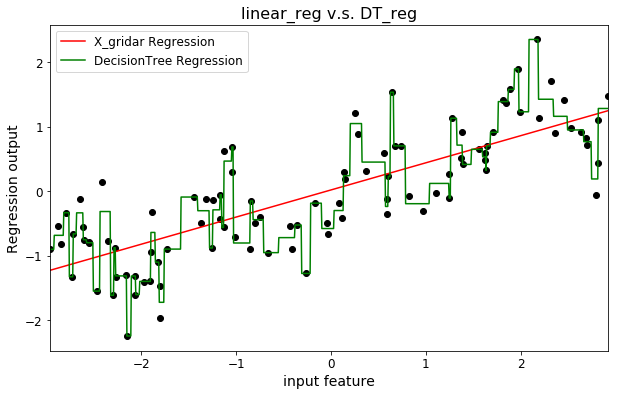

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# X.shape=(100, 1)
X, y = mglearn.datasets.make_wave(n_samples=100)
X_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

linear_reg =  LinearRegression()
linear_reg.fit(X, y)

dt_reg = DecisionTreeRegressor(min_samples_split=3, random_state=42)
dt_reg.fit(X, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'ko')
plt.plot(X_grid, linear_reg.predict(X_grid), 'r', label="X_gridar Regression")
plt.plot(X_grid, dt_reg.predict(X_grid), 'g', label="DecisionTree Regression")
plt.legend(loc="best", fontsize='large')
plt.xlim(X.min(), X.max())
plt.xlabel("input feature", fontsize=14)
plt.ylabel("Regression output", fontsize=14)
plt.title("linear_reg v.s. DT_reg", fontsize=16)
plt.show()

线性模型只能对线性关系建模。决策树可以构建更为复杂的数据模型，但这强烈依赖于数据表示。

**有一种方法可以让线性模型在连续数据上变得更加强大，就是使用分箱（bining)/离散化（discretiza）将其划分为多个特征。**

将特征的输入范围划分成固定个数的箱子（bin），那么数据点就可以用它所在的箱子表示。

In [87]:
# 定义10个均匀分布的箱子(bin)
bins = np.linspace(np.floor(X.min()), np.ceil(X.max()), 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

将数据集X中单个连续输入特征变换为一个分类特征，用于表示数据点所在的bin：

In [90]:
# 记录每个点属于的bin
which_bin = np.digitize(X, bins)

In [92]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [93]:
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]], dtype=int64)

然后利用`OneHotEncoder`将分类特征编码：

In [111]:
one_hot_enc = OneHotEncoder(sparse=False)
X_binned = one_hot_enc.fit_transform(which_bin)

In [112]:
X_binned[:5]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [113]:
X_binned.shape

(100, 10)

在one-hot编码后的数据上构建新的线性模型和新的决策树模型：

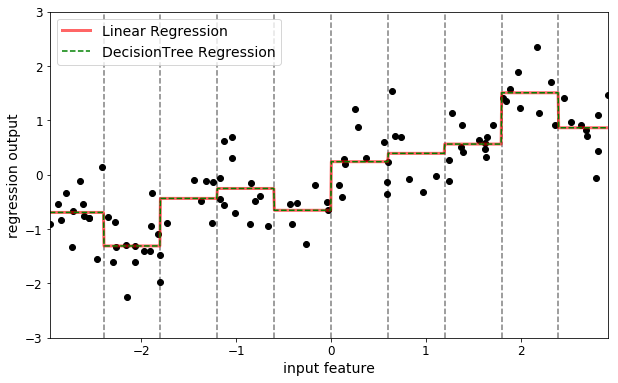

In [137]:
X_grid_binned = one_hot_enc.transform(np.digitize(X_grid, bins))

linear_reg = LinearRegression().fit(X_binned, y)
dt_reg = DecisionTreeRegressor(random_state=42).fit(X_binned, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'ko')
plt.plot(X_grid, linear_reg.predict(X_grid_binned), 'r', linewidth=3,
         alpha=.6, label="Linear Regression")
plt.plot(X_grid, dt_reg.predict(X_grid_binned), 'g--',
         label="DecisionTree Regression")
plt.vlines(bins, -3, 3, linestyle='--', color='grey')
plt.legend(loc="best", fontsize=14)
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.show()

> 对于每个箱子，二者预测的结果一样，都为一个常数值。因为每个bin内的特征是不变的，所以对于一个箱子内的所有点，任何模型都会预测相同的值。

## 3 交互特征和多项式特征

想要丰富的特征表示，特别是对线性模型而言，另一种方法是**添加原始数据的交互特征（interaction feature）和多项式特征（polynomial feature）**。

线性模型不仅可以学习偏移，还可以学习斜率。想要向分箱数据上的线性模型添加斜率，一种方法是重新加入原始特征。

In [141]:
X_combined = np.hstack((X, X_binned))

In [143]:
X_combined.shape

(100, 11)

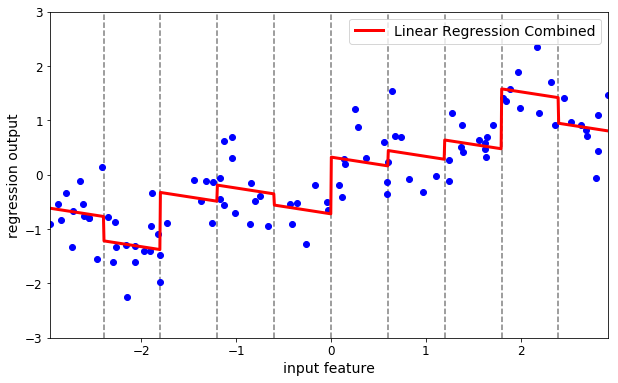

In [150]:
X_grid_binned = one_hot_enc.transform(np.digitize(X_grid, bins))
X_grid_combined = np.hstack((X_grid, X_grid_binned))

linear_reg = LinearRegression().fit(X_combined, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'bo')
plt.plot(X_grid, linear_reg.predict(X_grid_combined), 'r', linewidth=3,
         label="Linear Regression Combined")
plt.vlines(bins, -3, 3, linestyle='--', color='grey')
plt.legend(loc="best", fontsize=14)
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.show()

> 学到的斜率是向下的，并且在所有bin中都相同——只有一个X轴特征，也就只有一个斜率。斜率都是相同的，可能不是很有用。

希望**每个bin都有一个不同的斜率**。可以**添加交互特征或乘积特征，用来表示数据点所在的bin以及数据点在X轴上位置**。这个特征是bin指示符与原始特征的乘积。

In [152]:
X_product = np.hstack([X_binned, X * X_binned])
X_product.shape

(100, 20)

> 20个特征：数据点所在bin的指示符和原始特征与bin指示符的乘积。可以将乘积特征看作每个bin X轴特征的副本。它在bin内等于原始特征，在其他位置等于0。

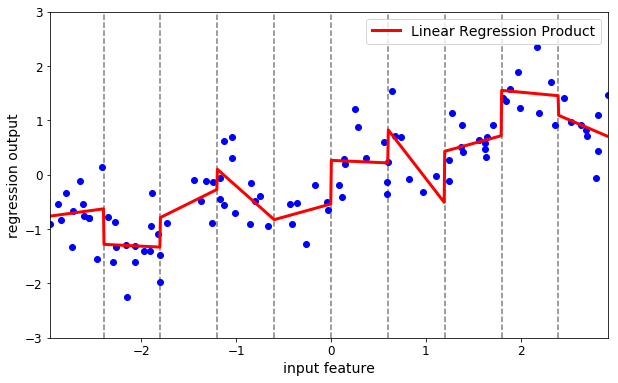

In [154]:
X_grid_binned = one_hot_enc.transform(np.digitize(X_grid, bins))
X_grid_product = np.hstack((X_grid_binned, X_grid * X_grid_binned))

linear_reg = LinearRegression().fit(X_product, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'bo')
plt.plot(X_grid, linear_reg.predict(X_grid_product), 'r', linewidth=3,
         label="Linear Regression Product")
plt.vlines(bins, -3, 3, linestyle='--', color='grey')
plt.legend(loc="best", fontsize=14)
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.show()

> 这个模型中每个bin都有自己的偏移和斜率。

**使用分箱**是**扩展连续特征**的一种方法。另一种方法是**使用原始的多项式**。

In [155]:
from sklearn.preprocessing import PolynomialFeatures

# 包含直到x**10的多项式
# 默认的include_bias=True添加恒等于1的常数特征
poly_features = PolynomialFeatures(degree=10, include_bias=False)  # 不含常数特征
X_poly = poly_features.fit_transform(X)

In [156]:
X_poly.shape

(100, 10)

In [157]:
# 总输入特征数
poly_features.n_input_features_

1

In [158]:
# 总输出特征数
poly_features.n_output_features_

10

In [160]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [161]:
X_poly[:5]

array([[ -7.52759287e-01,   5.66646544e-01,  -4.26548448e-01,
          3.21088306e-01,  -2.41702204e-01,   1.81943579e-01,
         -1.36959719e-01,   1.03097700e-01,  -7.76077513e-02,
          5.84199555e-02],
       [  2.70428584e+00,   7.31316190e+00,   1.97768801e+01,
          5.34823369e+01,   1.44631526e+02,   3.91124988e+02,
          1.05771377e+03,   2.86036036e+03,   7.73523202e+03,
          2.09182784e+04],
       [  1.39196365e+00,   1.93756281e+00,   2.69701700e+00,
          3.75414962e+00,   5.22563982e+00,   7.27390068e+00,
          1.01250053e+01,   1.40936394e+01,   1.96178338e+01,
          2.73073115e+01],
       [  5.91950905e-01,   3.50405874e-01,   2.07423074e-01,
          1.22784277e-01,   7.26822637e-02,   4.30243318e-02,
          2.54682921e-02,   1.50759786e-02,   8.92423917e-03,
          5.28271146e-03],
       [ -2.06388816e+00,   4.25963433e+00,  -8.79140884e+00,
          1.81444846e+01,  -3.74481869e+01,   7.72888694e+01,
         -1.59515582e+02

可以用`get_feature_names`方法来获取特征的含义，给出每个特征的指数：

In [164]:
# 输出特征的特征名
poly_features.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

将多项式特征与线性回归模型一起使用，可以得到经典的**多项式回归（polynomial regression）**模型：

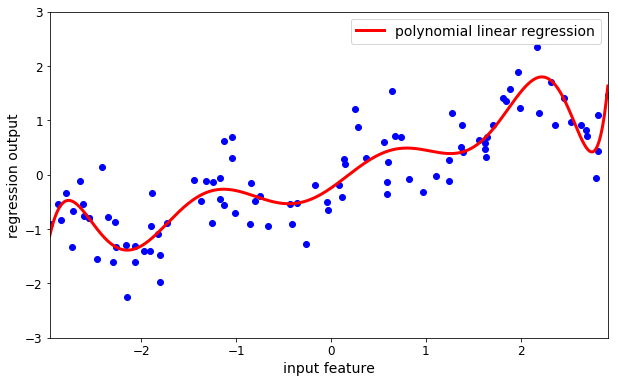

In [166]:
linear_reg = LinearRegression().fit(X_poly, y)

X_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_grid_poly = poly_features.transform(X_grid)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'bo')
plt.plot(X_grid, linear_reg.predict(X_grid_poly), 'r', linewidth=3,
         label="polynomial linear regression")
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.show()